# Model checking

In the last part you have been introduced to LTL formulas and you have seen that we can easily check whether or two
a formula/automaton is equivalent to another.

But how does this work?
In order to check if two automata A1 and A2 accept the same language, we have to check if $L(A1) = L(A2)$.
This is however not feasible, we therefore follow a different approach:
$L(A1) \cap \overline{L(A2)} = L(A1) \cap L(\overline{A2}) = L(A1 \times \overline{A2}) = \emptyset$?
and
$\overline{L(A1)} \cap L(A2) = L(\overline{A1}) \cap L(A2) = L(\overline{A1} \times A2) = \emptyset$?
That is we check whether the language of A1 intersects with the complement of the language of A2.

This is known as model checking, and a run in the product automaton $A1 \times \bar{A2}$ is a witness for bad behaviour.

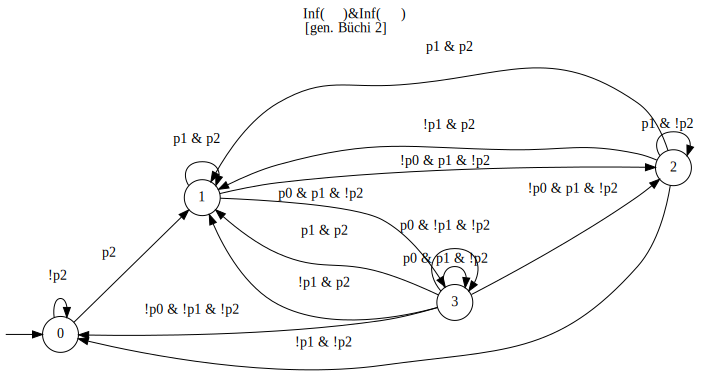

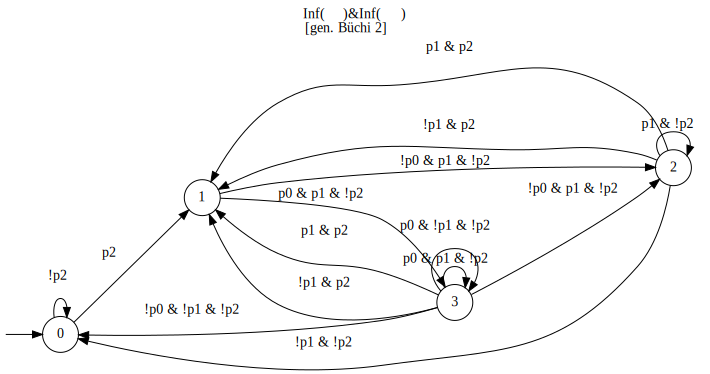

In [19]:
from AAA_utils import *
# How to compute and highlight a run
A1 = spot.translate("G(p2 -> X(p1 xor (p0 U Gp1))) & GFp2")
A2 = spot.translate("G(p2 -> X(p1 xor (p0 U Gp1))) & GFp2 & G(p2 -> X(~p2))", dict=A1.get_dict()) # Use the same propositions
display(A1.show("kbr"))
display(A2.show("kbr"))

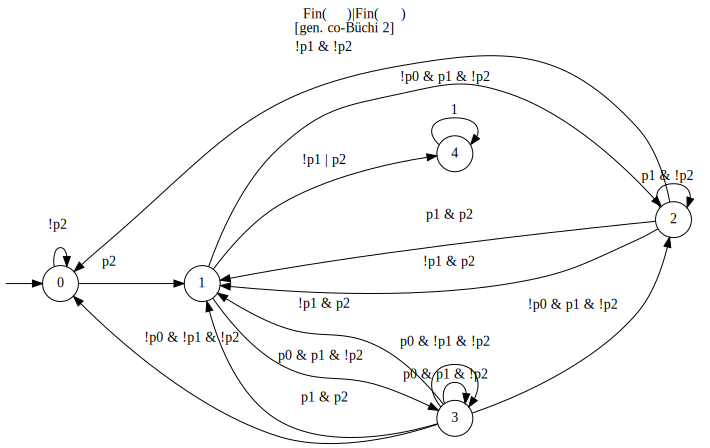

In [20]:
#First we need to completement A2
A2c = spot.complement(A2)
display(A2c.show("kbr"))

In [21]:
# Then we can check if there is a common run
r = A1.intersecting_run(A2c)
# r is not None, so it exists, and we have shown A1 != A2
r.highlight(1)
print(r)

Prefix:
  0
  |  p2	{0,1}
  1
  |  p1 & p2	{1}
Cycle:
  1
  |  !p0 & p1 & !p2
  2
  |  !p1 & !p2	{0}
  0
  |  p2	{0,1}



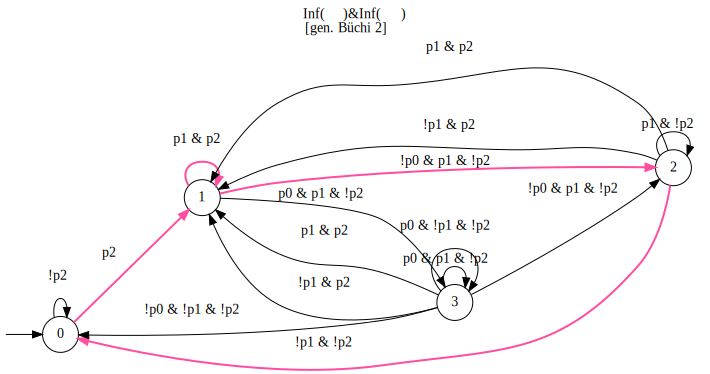

In [22]:
display(A1.show("kbr"))

# A proactical example

In practice, you typically give your specifications as LTL but not your models.
In the course you have shortly discussed multiple file formats and programs to do this.

For the rest of this part we are concerned with an elevator model.

## Part 1

Below the elevator model as well as a naive controller is given.
In the first part, you need to write a specification (in LTL) that is
  1) Reasonable from an applicative view-point
  2) Violated by the behaviour of the elevator model controlled by the naive controller